In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("figure", figsize=(15,8))
plt.rc("font", size=14)

### Github dos dados obtidos no site do datasus sobre tuberculose

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'

# url = 'A234534189_28_143_208.csv' # no caso de não encontrar o arquivo na internet ou ficar sem acesso
dados = pd.read_csv(url, encoding= 'ISO-8859-1', sep= ';', skiprows= 3, skipfooter= 16, engine='python')
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
dados.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


## Limpeza dados

In [4]:
dados.drop(index=19, inplace=True)
dados.drop('Total', axis=1, inplace=True)
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [5]:
df = dados.melt(id_vars= 'Ano Diagnóstico', value_name= 'Casos', var_name= 'Mês').copy()
df

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


## Tentativa de modificação dos dados de tempo em tipo datetime

In [6]:
df['Data'] = df['Ano Diagnóstico'] + '-' + df['Mês']
df

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


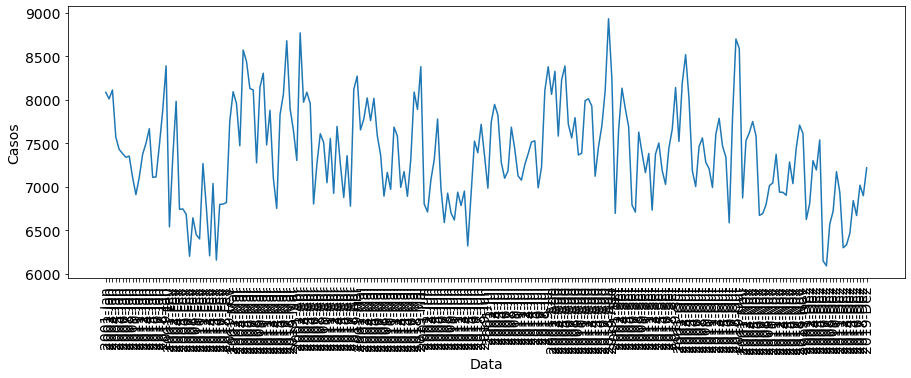

In [7]:
plt.figure(figsize= (15,5))
sns.lineplot(x='Data', y='Casos', data= df)
plt.xticks(rotation= 90)
plt.show()

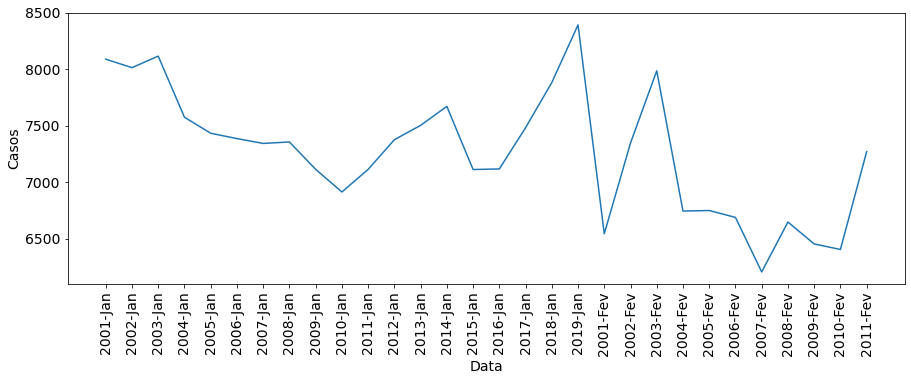

In [8]:
plt.figure(figsize= (15,5))
sns.lineplot(x='Data', y='Casos', data= df[:30])
plt.xticks(rotation= 90)
plt.show()

### O método anterior não funciona porque a lingua da linguagem é inglês e o nome dos meses tem que ser traduzido antes das manipulações

In [9]:
meses_en_ptbr = {'Jan': 'Jan', 'Fev': 'Feb', 'Mar': 'Mar' ,
                 'Abr': 'Apr','Mai': 'May', 'Jun': 'Jun', 
                 'Jul': 'Jul', 'Ago': 'Aug', 'Set': 'Sep', 
                 'Out': 'Oct', 'Nov': 'Nov', 'Dez': 'Dec'}

df['Mês'] = df['Mês'].map(meses_en_ptbr)

In [10]:
df['Data'] = df['Ano Diagnóstico'] + '-' + df['Mês']
df

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dec,6844,2015-Dec
224,2016,Dec,6672,2016-Dec
225,2017,Dec,7020,2017-Dec
226,2018,Dec,6900,2018-Dec


In [11]:
df['Data'] = pd.to_datetime(df['Data'])
df

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
1,2002,Jan,8013,2002-01-01
2,2003,Jan,8115,2003-01-01
3,2004,Jan,7574,2004-01-01
4,2005,Jan,7432,2005-01-01
...,...,...,...,...
223,2015,Dec,6844,2015-12-01
224,2016,Dec,6672,2016-12-01
225,2017,Dec,7020,2017-12-01
226,2018,Dec,6900,2018-12-01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.2+ KB


In [13]:
df.drop(['Ano Diagnóstico','Mês'], axis=1, inplace=True)
df

,Casos,Data
0,8088,2001-01-01
1,8013,2002-01-01
2,8115,2003-01-01
3,7574,2004-01-01
4,7432,2005-01-01
...,...,...
223,6844,2015-12-01
224,6672,2016-12-01
225,7020,2017-12-01
226,6900,2018-12-01


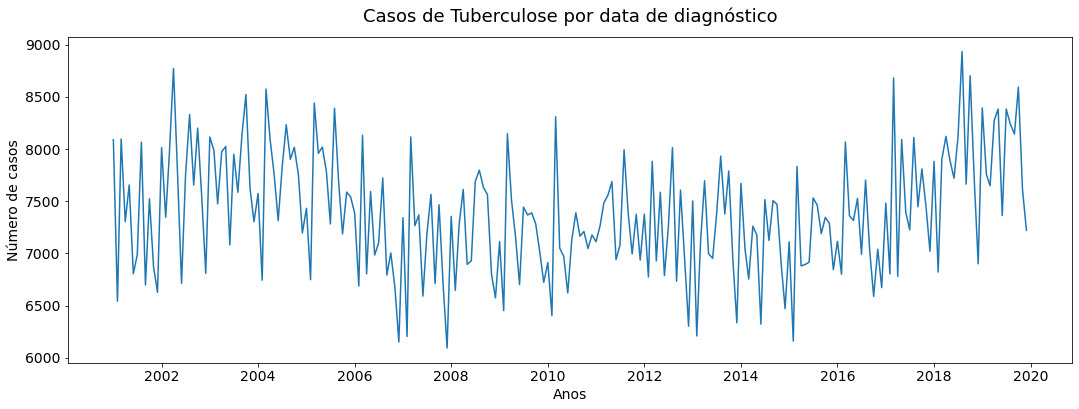

In [14]:
plt.figure(figsize= (18,6))
sns.lineplot(x='Data', y='Casos', data= df)
plt.title('Casos de Tuberculose por data de diagnóstico', pad=15, fontsize=18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de casos', fontsize=14)
#plt.xticks(rotation= 45)
plt.show()

---

## Ordenação da base de dados

In [15]:
df.sort_values(by=["Data"], inplace=True)
df

,Casos,Data
0,8088,2001-01-01
19,6542,2001-02-01
38,8095,2001-03-01
57,7305,2001-04-01
76,7656,2001-05-01
...,...,...
151,8239,2019-08-01
170,8143,2019-09-01
189,8592,2019-10-01
208,7615,2019-11-01


In [16]:
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)
df

,Casos,Data
0,8088,2001-01-01
1,6542,2001-02-01
2,8095,2001-03-01
3,7305,2001-04-01
4,7656,2001-05-01
...,...,...
223,8239,2019-08-01
224,8143,2019-09-01
225,8592,2019-10-01
226,7615,2019-11-01


## Média móvel

In [17]:
df['Média_movel_3'] = df['Casos'].rolling(3).mean()
df

,Casos,Data,Média_movel_3
0,8088,2001-01-01,NaN
1,6542,2001-02-01,NaN
2,8095,2001-03-01,7575.000000
3,7305,2001-04-01,7314.000000
4,7656,2001-05-01,7685.333333
...,...,...,...
223,8239,2019-08-01,7994.666667
224,8143,2019-09-01,8254.666667
225,8592,2019-10-01,8324.666667
226,7615,2019-11-01,8116.666667


In [18]:
df['Média_movel_6'] = df['Casos'].rolling(6).mean()
df

,Casos,Data,Média_movel_3,Média_movel_6
0,8088,2001-01-01,NaN,NaN
1,6542,2001-02-01,NaN,NaN
2,8095,2001-03-01,7575.000000,NaN
3,7305,2001-04-01,7314.000000,NaN
4,7656,2001-05-01,7685.333333,NaN
...,...,...,...,...
223,8239,2019-08-01,7994.666667,8048.166667
224,8143,2019-09-01,8254.666667,8130.666667
225,8592,2019-10-01,8324.666667,8183.666667
226,7615,2019-11-01,8116.666667,8055.666667


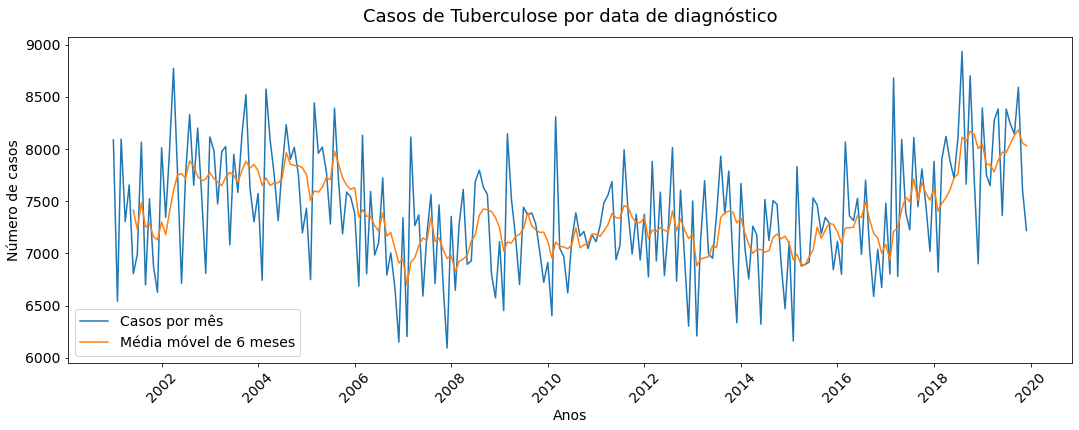

In [19]:
plt.figure(figsize= (18,6))
sns.lineplot(x='Data', y='Casos', data= df)
sns.lineplot(x='Data', y='Média_movel_6', data= df)
plt.title('Casos de Tuberculose por data de diagnóstico', pad=15, fontsize=18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de casos', fontsize=14)
plt.xticks(rotation= 45)
plt.legend(["Casos por mês", 'Média móvel de 6 meses'])
plt.show()

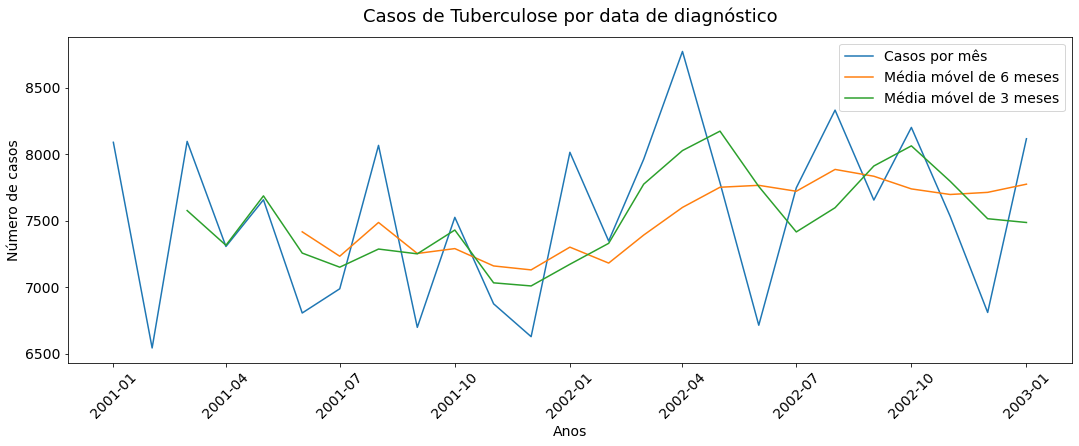

In [20]:
plt.figure(figsize= (18,6))
sns.lineplot(x='Data', y='Casos', data= df[:25])
sns.lineplot(x='Data', y='Média_movel_6', data= df[:25])
sns.lineplot(x='Data', y='Média_movel_3', data= df[:25])
plt.title('Casos de Tuberculose por data de diagnóstico', pad=15, fontsize=18)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de casos', fontsize=14)
plt.xticks(rotation= 45)
plt.legend(["Casos por mês", 'Média móvel de 6 meses', 'Média móvel de 3 meses'])
plt.show()

---

In [21]:
#resposta desafio
df.set_index("Data")

,Casos,Média_movel_3,Média_movel_6
Data,,,
2001-01-01,8088,NaN,NaN
2001-02-01,6542,NaN,NaN
2001-03-01,8095,7575.000000,NaN
2001-04-01,7305,7314.000000,NaN
2001-05-01,7656,7685.333333,NaN
...,...,...,...
2019-08-01,8239,7994.666667,8048.166667
2019-09-01,8143,8254.666667,8130.666667
2019-10-01,8592,8324.666667,8183.666667


### Criação de colunas com a informação de mês e ano

In [22]:
df['Data'].dt.year

0      2001
1      2001
2      2001
3      2001
4      2001
       ... 
223    2019
224    2019
225    2019
226    2019
227    2019
Name: Data, Length: 228, dtype: int64

In [23]:
df['Data'].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
223     8
224     9
225    10
226    11
227    12
Name: Data, Length: 228, dtype: int64

In [24]:
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df

,Casos,Data,Média_movel_3,Média_movel_6,Ano,Mês
0,8088,2001-01-01,NaN,NaN,2001,1
1,6542,2001-02-01,NaN,NaN,2001,2
2,8095,2001-03-01,7575.000000,NaN,2001,3
3,7305,2001-04-01,7314.000000,NaN,2001,4
4,7656,2001-05-01,7685.333333,NaN,2001,5
...,...,...,...,...,...,...
223,8239,2019-08-01,7994.666667,8048.166667,2019,8
224,8143,2019-09-01,8254.666667,8130.666667,2019,9
225,8592,2019-10-01,8324.666667,8183.666667,2019,10
226,7615,2019-11-01,8116.666667,8055.666667,2019,11


<AxesSubplot:xlabel='Mês', ylabel='Casos'>

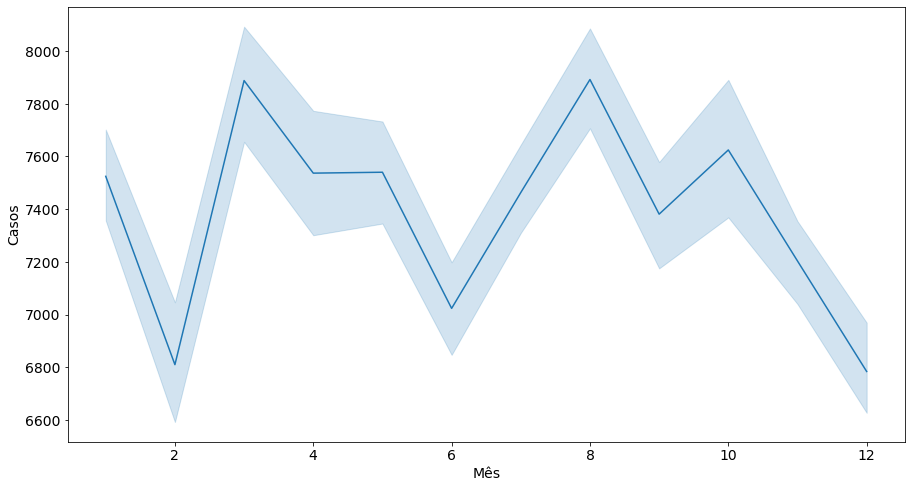

In [25]:
sns.lineplot(x='Mês', y='Casos', data= df)

<AxesSubplot:xlabel='Mês', ylabel='Casos'>

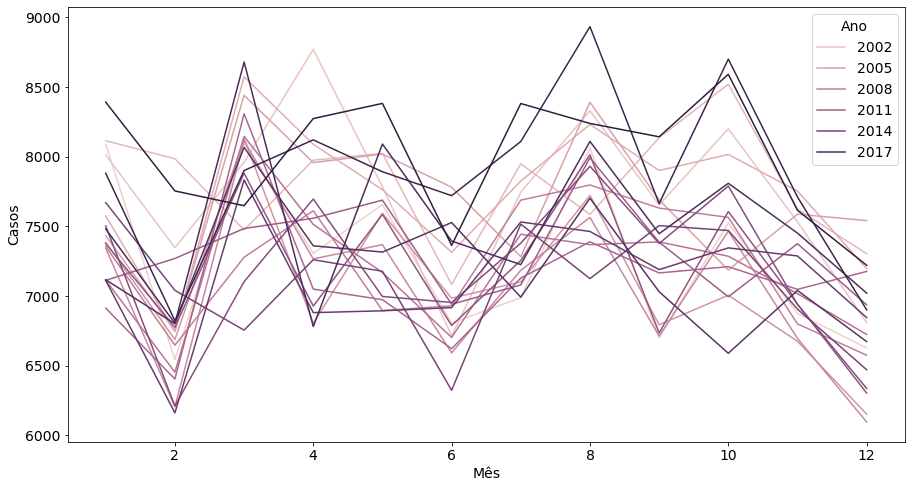

In [26]:
sns.lineplot(x='Mês', y='Casos', data= df, hue='Ano')

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
df.set_index("Data", inplace=True)

In [29]:
decomposicao = seasonal_decompose(df['Casos'])

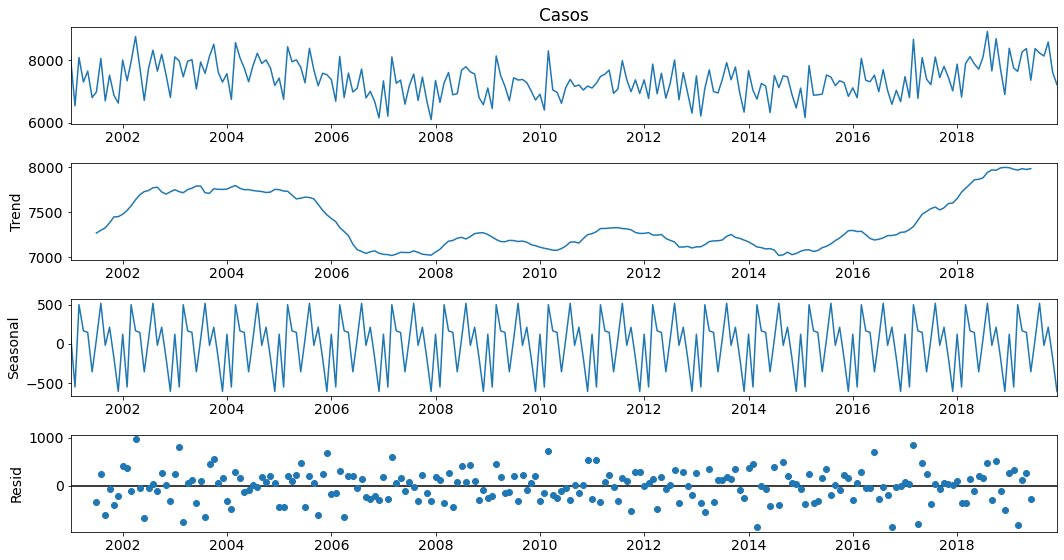

In [30]:
decomposicao.plot();

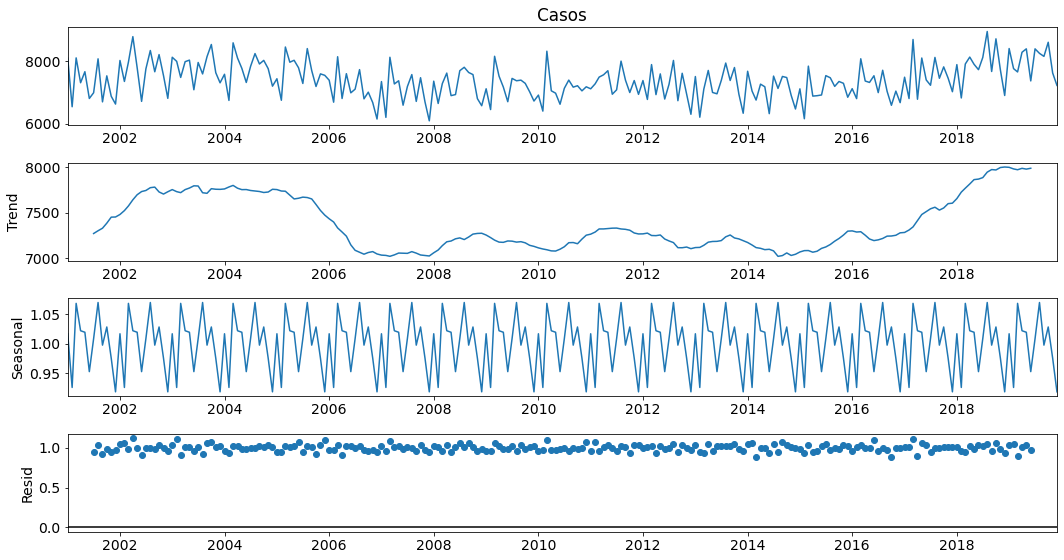

In [31]:
decomposicao_m = seasonal_decompose(df['Casos'], model='multiplicative')
decomposicao_m.plot();

### Aparentemente nada mudou, porém se observar bem, o valor de residuo diminuiu a amplitude

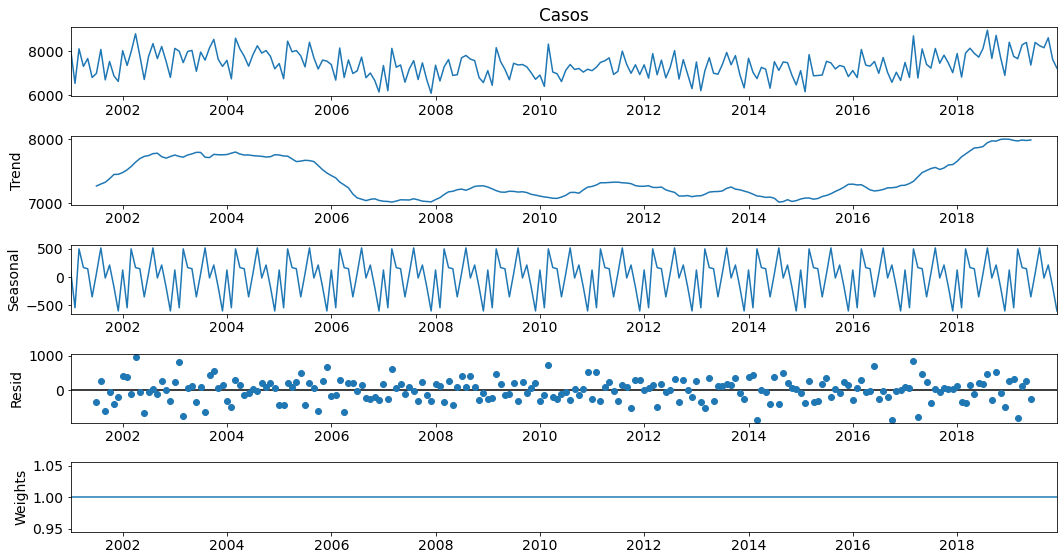

In [32]:
decomposicao.plot(weights=True); 
# weights = pesos

<AxesSubplot:xlabel='Data'>

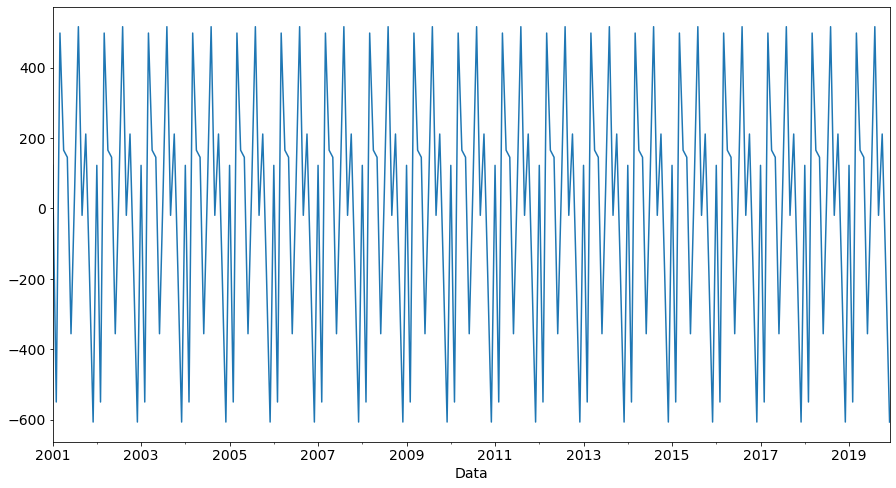

In [33]:
decomposicao.seasonal.plot()

<AxesSubplot:xlabel='Data'>

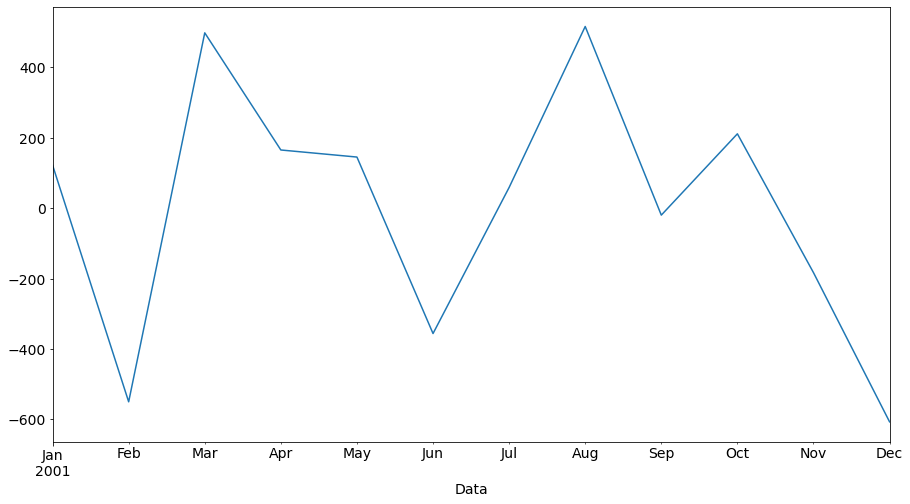

In [34]:
decomposicao.seasonal[:12].plot()

<AxesSubplot:xlabel='Data'>

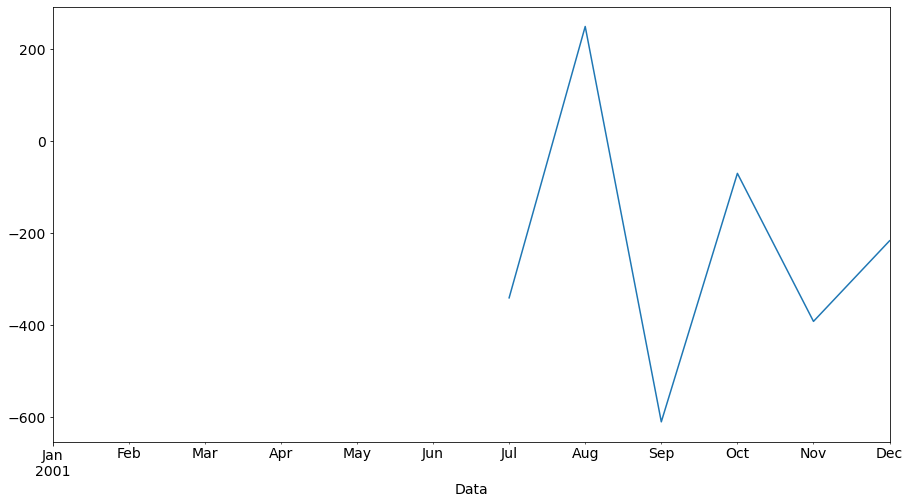

In [35]:
decomposicao.resid[:12].plot()

---

## Autocorrelação

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

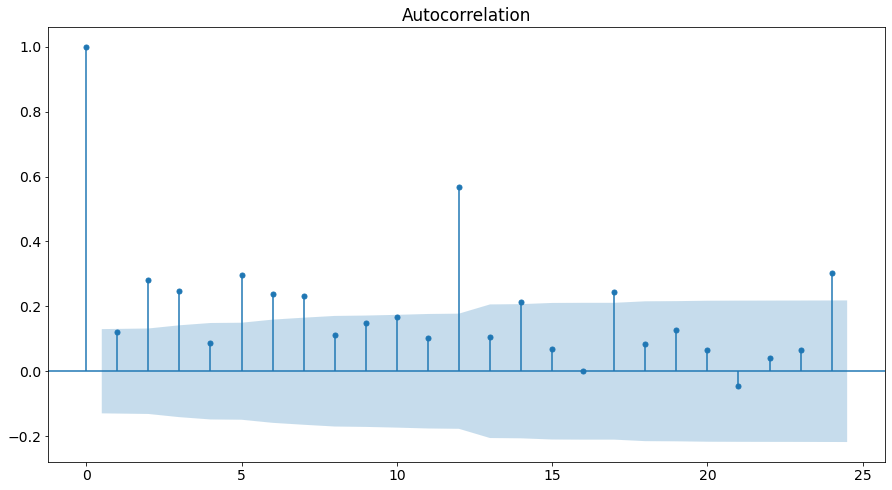

In [37]:
plot_acf(df.Casos);

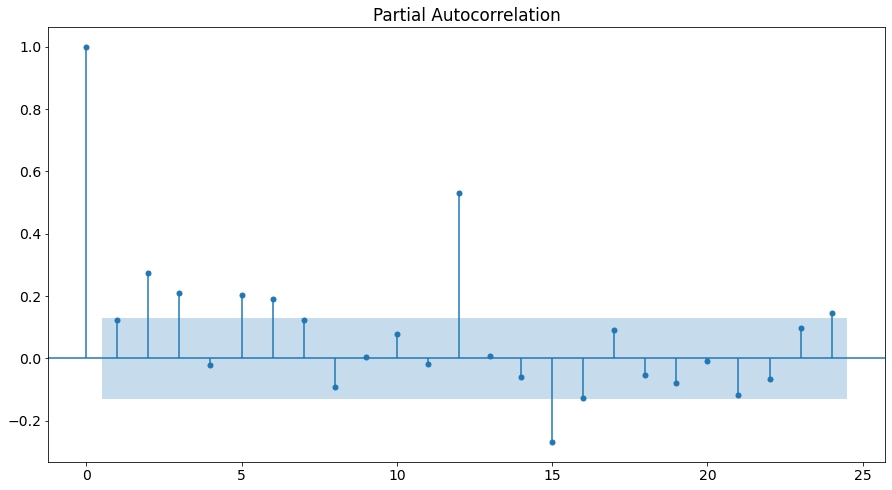

In [38]:
plot_pacf(df.Casos);

---

## Previsões com ARIMA

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
modelo_arima = ARIMA(df.Casos.values.astype('float32'), order=[0,0,0]) # esse astype é por causa do método Forecast
modelo_arima_treinado = modelo_arima.fit()

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [41]:
modelo_arima_treinado.forecast(12)

(array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
        7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
        7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772]),
 array([567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306,
        567.21170306, 567.21170306, 567.21170306, 567.21170306]),
 array([[6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734],
        [6277.5705781 , 8500.99959734]]))

In [42]:
modelo_arima_treinado.forecast(12)[0] # esse resultado, por conta da order=[0,0,0] dá a previsão como média

array([7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772,
       7389.28508772, 7389.28508772, 7389.28508772, 7389.28508772])

In [43]:
df.Casos.mean()

7389.285087719299

### Separação dos dados em treino e teste

In [44]:
dados_treino = df.query("Ano < 2019")
dados_teste = df.query("Ano == 2019")

modelo_arima = ARIMA(dados_treino.Casos.values.astype('float32'), order=[0,0,0]) # esse astype é por causa do método Forecast
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

<ipython-input-45-56a2d0fcda0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste['previsao'] = previsao


<AxesSubplot:xlabel='Data', ylabel='Casos'>

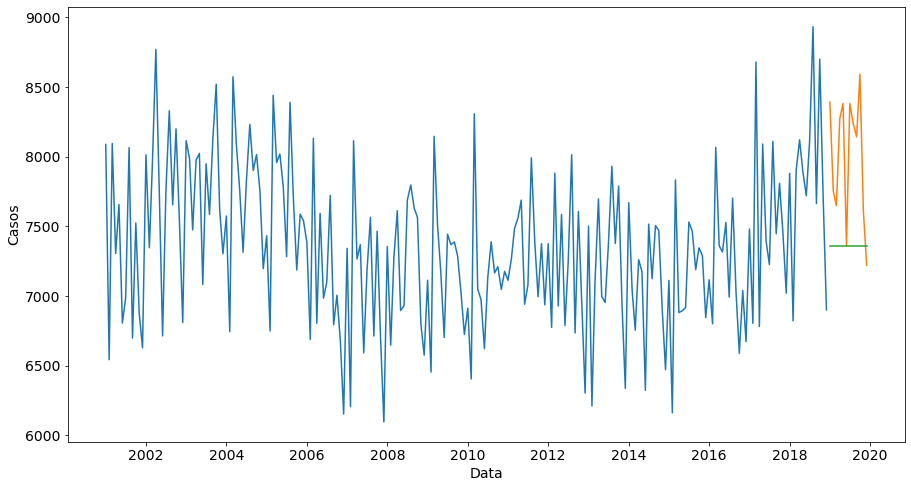

In [45]:
dados_teste['previsao'] = previsao

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

### Modelo autoregressivo

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-46-5557fa4eef96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<AxesSubplot:xlabel='Data', ylabel='Casos'>

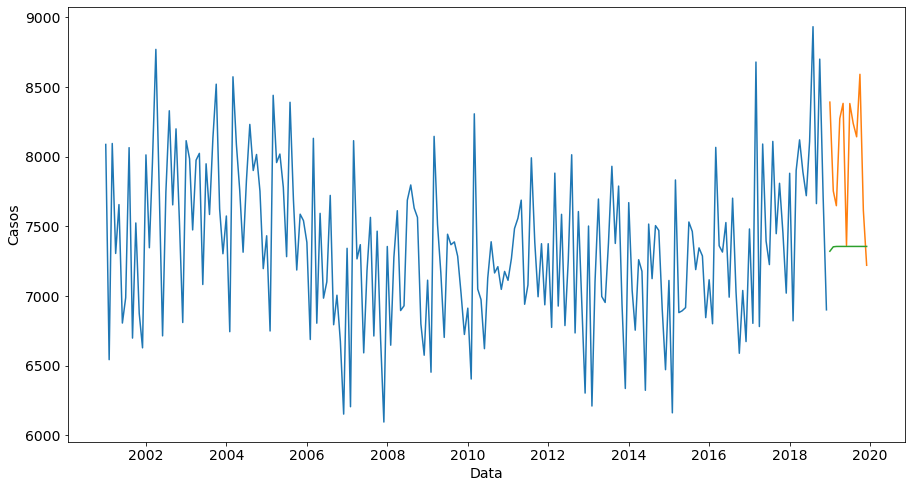

In [46]:
modelo_arima = ARIMA(dados_treino.Casos.values.astype('float32'), order=[1,0,0])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

dados_teste['previsao'] = previsao

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

### Diferença pouco perceptível

---

### Modelo de médias móveis

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-47-9e0c109b2ba8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<AxesSubplot:xlabel='Data', ylabel='Casos'>

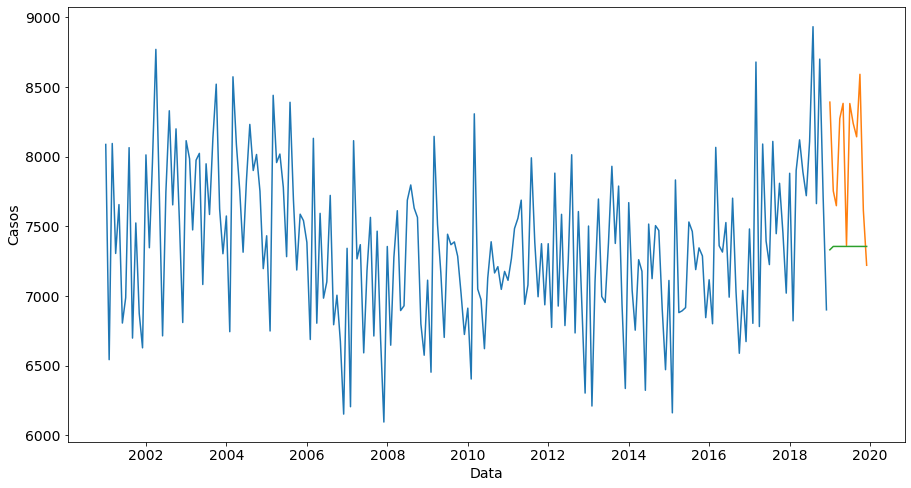

In [47]:
modelo_arima = ARIMA(dados_treino.Casos.values.astype('float32'), order=[0,0,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

dados_teste['previsao'] = previsao

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

---

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-48-a17be2ebe26c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<AxesSubplot:xlabel='Data', ylabel='Casos'>

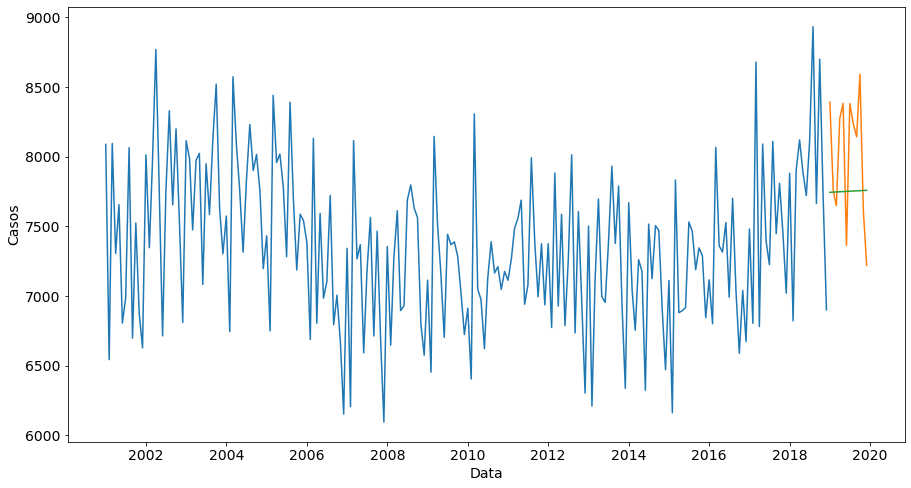

In [48]:
modelo_arima = ARIMA(dados_treino.Casos.values.astype('float32'), order=[0,1,1])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

dados_teste['previsao'] = previsao

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<AxesSubplot:xlabel='Data', ylabel='Casos'>

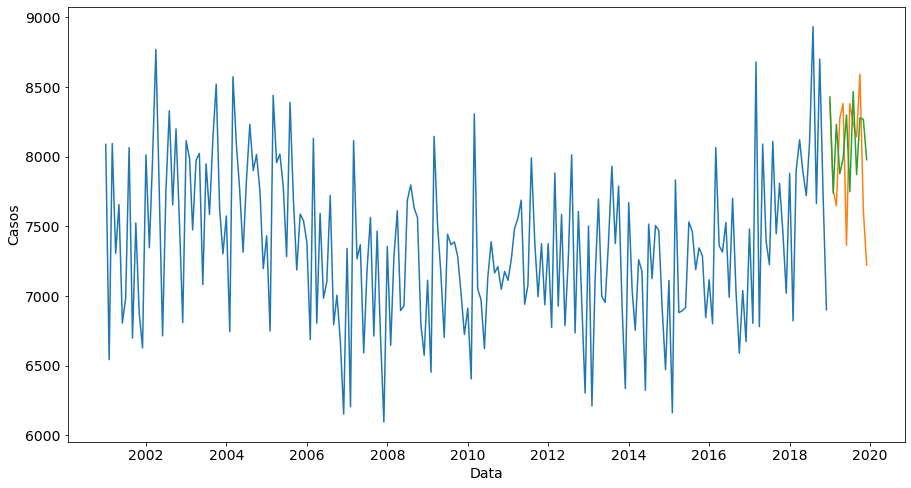

In [49]:
modelo_arima = ARIMA(dados_treino.Casos.values.astype('float32'), order=[4,2,4])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

dados_teste['previsao'] = previsao

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

<AxesSubplot:xlabel='Data', ylabel='Casos'>

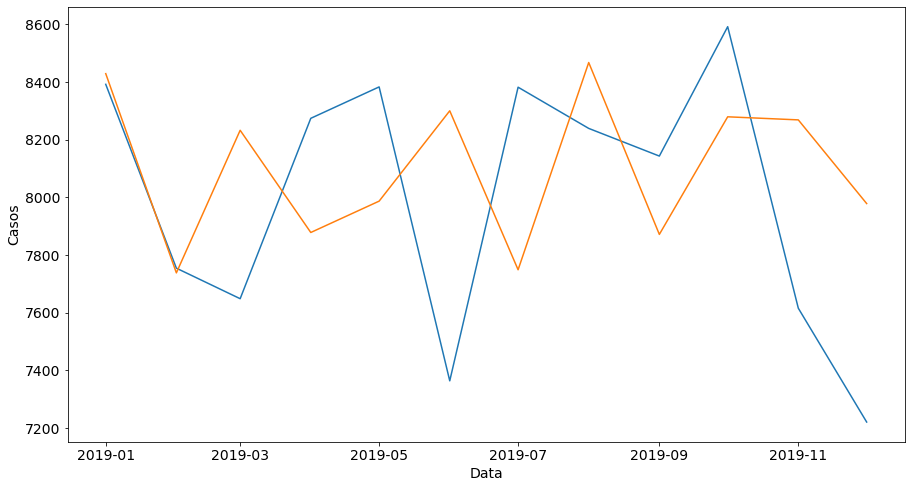

In [50]:
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dudu_\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<AxesSubplot:xlabel='Data', ylabel='Casos'>

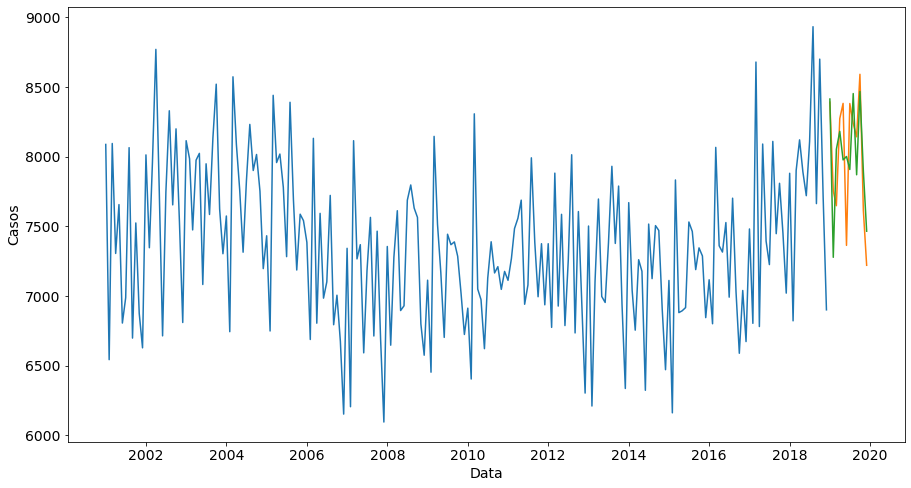

In [51]:
modelo_arima = ARIMA(dados_treino.Casos.values.astype('float32'), order=[12,2,4])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(12)[0]

dados_teste['previsao'] = previsao

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao', data= dados_teste)

---

## Auto ARIMA

In [52]:
# ! pip install pmdarima

In [53]:
from pmdarima.arima import auto_arima

In [54]:
modelo_autoarima = auto_arima(dados_treino.Casos.values, error_action='ignore', trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3462.510, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3366.610, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3312.298, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3460.524, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3309.482, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3310.770, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3311.065, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3310.088, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3344.652, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3307.835, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3310.594, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3364.610, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3309.098, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [55]:
modelo_autoarima

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

---

## Desafio

In [56]:
teste_modificado = auto_arima(dados_treino.Casos.values, error_action='ignore', 
                              trace=True, max_q=24 , max_p=24 , max_d=24, max_P=24, max_D=24, max_Q=24, max_order=25, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=2.06 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.41 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=3232.376, Time=7.37 sec
 ARIMA(0,1,1)(1,0,3)[12] intercept   : AIC=inf, Time=11.55 sec
 ARIMA(0,1,1)(0,0,4)[12] intercept   : AIC=3230.070, Time=18.18 sec
 ARIMA(0,1,1)(1,0,4)[12] intercept   : AIC=3227.601, Time=25.06 sec
 ARIMA(0,1,1)(2,0,4)[12] intercept   : AIC=inf, Time=20.89 sec
 ARIMA(0,1,1)(1,0,5)[12] intercept   : A

<ipython-input-57-1c8cb3a92d0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste['previsao_autoarima_manipulado'] = previsao_autoarima_teste


<AxesSubplot:xlabel='Data', ylabel='Casos'>

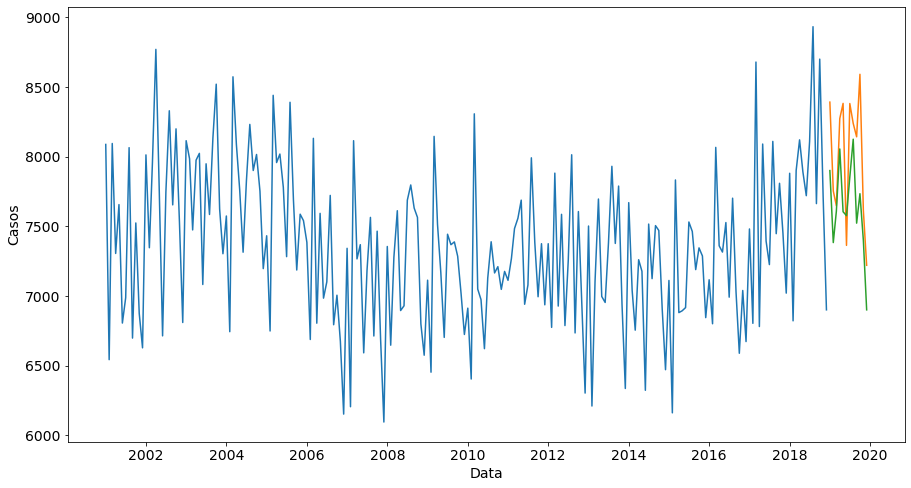

In [57]:
previsao_autoarima_teste = teste_modificado.predict(12)

dados_teste['previsao_autoarima_manipulado'] = previsao_autoarima_teste

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima_manipulado', data= dados_teste)

<AxesSubplot:xlabel='Data', ylabel='Casos'>

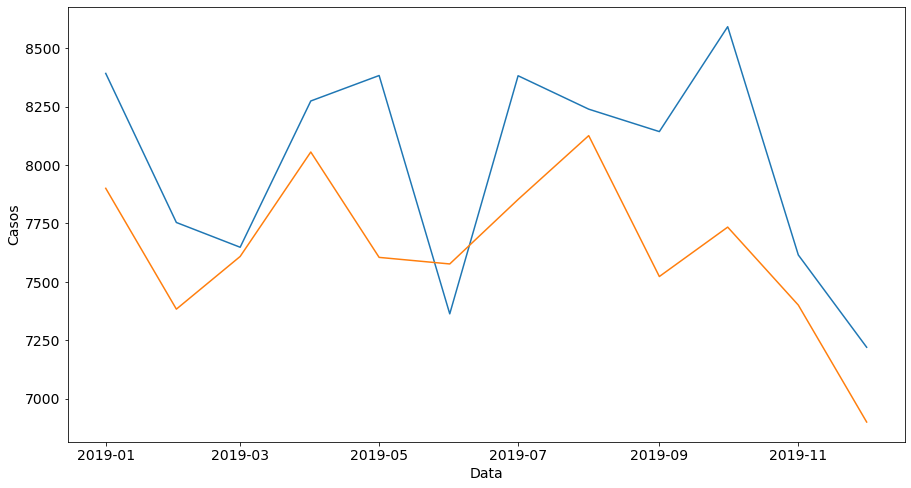

In [58]:
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima_manipulado', data= dados_teste)

---

<ipython-input-59-54898c4e848a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste['previsao_autoarima'] = previsao_autoarima


<AxesSubplot:xlabel='Data', ylabel='Casos'>

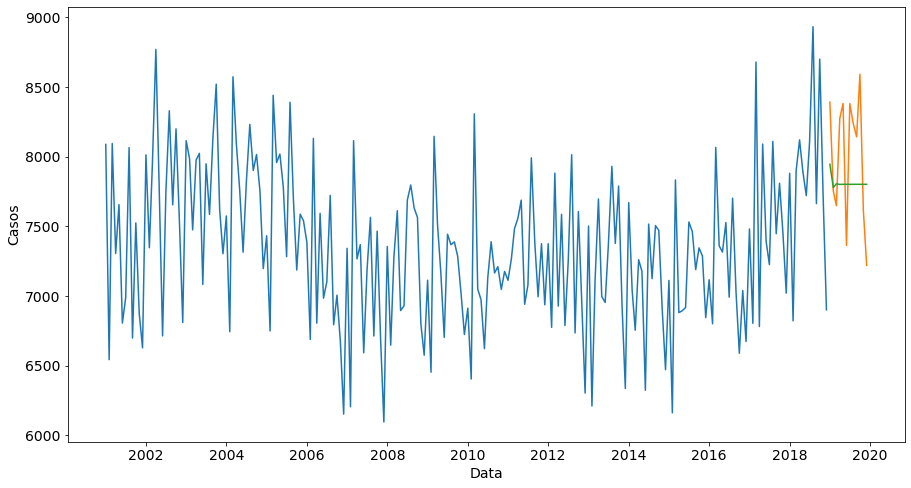

In [59]:
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste['previsao_autoarima'] = previsao_autoarima

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima', data= dados_teste)

## Faltou definir a sazonalidade por isso ficou ruim a previsão

In [60]:
modelo_autoarima = auto_arima(dados_treino.Casos.values, error_action='ignore', trace=True, m=12) # por conta de serem dados mensais colocamos o m=12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=2.45 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=6.34 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.49 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.81 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.64 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3

<ipython-input-61-54898c4e848a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_teste['previsao_autoarima'] = previsao_autoarima


<AxesSubplot:xlabel='Data', ylabel='Casos'>

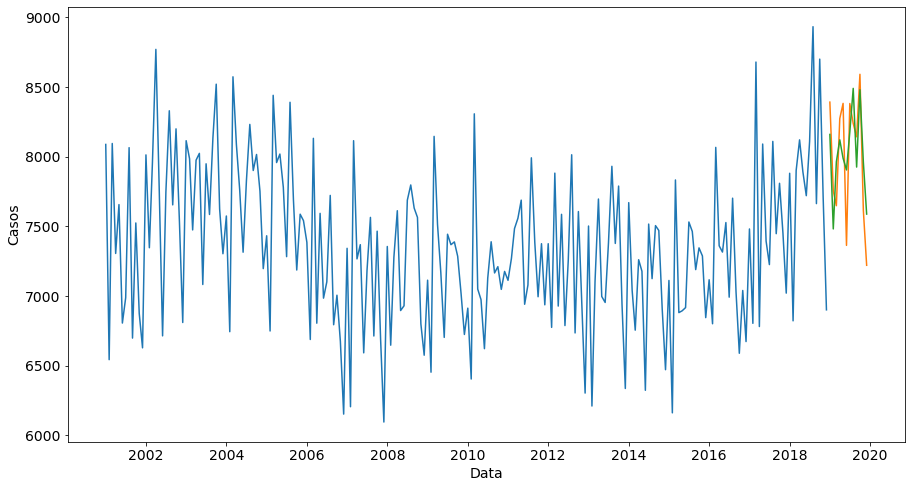

In [61]:
previsao_autoarima = modelo_autoarima.predict(12)

dados_teste['previsao_autoarima'] = previsao_autoarima

sns.lineplot(x='Data', y='Casos', data= dados_treino)
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima', data= dados_teste)

<AxesSubplot:xlabel='Data', ylabel='Casos'>

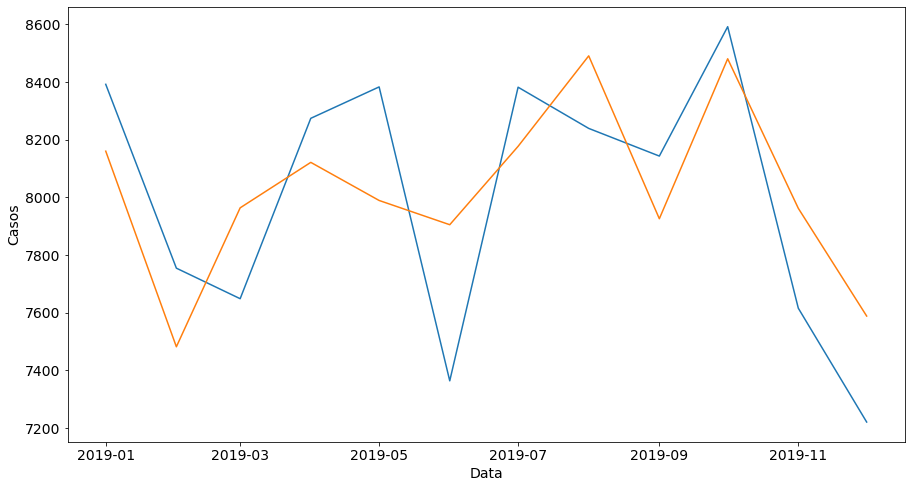

In [62]:
sns.lineplot(x='Data', y='Casos', data= dados_teste)
sns.lineplot(x='Data', y='previsao_autoarima', data= dados_teste)

## Método para ver qual é o melhor modelo

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
resultado_autoarima_aula = mean_squared_error(dados_teste.Casos, dados_teste['previsao_autoarima'])
resultado_autoarima_manipulado = mean_squared_error(dados_teste.Casos, dados_teste['previsao_autoarima_manipulado'])
resultado_arima = mean_squared_error(dados_teste.Casos, dados_teste['previsao'])


In [65]:
print(f"AutoARIMA aula: {resultado_autoarima_aula}")
print(f"AutoARIMA modificado: {resultado_autoarima_manipulado}")
print(f"ARIMA normal: {resultado_arima}")


AutoARIMA aula: 93378.93285416179
AutoARIMA modificado: 220188.94293089418
ARIMA normal: 122769.32101454273


## O melhor modelo foi o autoarima sem manipulação

---

In [66]:
# Relembrando
dados_treino

,Casos,Média_movel_3,Média_movel_6,Ano,Mês
Data,,,,,
2001-01-01,8088,NaN,NaN,2001,1
2001-02-01,6542,NaN,NaN,2001,2
2001-03-01,8095,7575.000000,NaN,2001,3
2001-04-01,7305,7314.000000,NaN,2001,4
2001-05-01,7656,7685.333333,NaN,2001,5
...,...,...,...,...,...
2018-08-01,8934,8254.333333,8112.833333,2018,8
2018-09-01,7663,8235.333333,8073.166667,2018,9
2018-10-01,8701,8432.666667,8169.833333,2018,10


In [67]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [68]:
modelo_profeta = Prophet()
mapa = {'Data':'ds', 'Casos':'y'}
dados_treino_profeta = dados_treino.reset_index()
dados_treino_profeta = dados_treino_profeta[['Data', 'Casos']].rename(mapa, axis=1)
modelo_profeta_treinado = modelo_profeta.fit(dados_treino_profeta)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
futuro = modelo_profeta_treinado.make_future_dataframe(periods=12, freq='M')
futuro

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
223,2019-07-31
224,2019-08-31
225,2019-09-30
226,2019-10-31


In [70]:
resultado_profeta = modelo_profeta_treinado.predict(futuro)
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,7682.208168,7380.849253,8303.351656,7682.208168,7682.208168,159.801416,159.801416,159.801416,159.801416,159.801416,159.801416,0.0,0.0,0.0,7842.009584
1,2001-02-01,7679.559137,6495.963670,7364.199178,7679.559137,7679.559137,-759.634359,-759.634359,-759.634359,-759.634359,-759.634359,-759.634359,0.0,0.0,0.0,6919.924778
2,2001-03-01,7677.166464,7794.395314,8701.207964,7677.166464,7677.166464,557.281663,557.281663,557.281663,557.281663,557.281663,557.281663,0.0,0.0,0.0,8234.448126
3,2001-04-01,7674.517432,7318.444228,8238.298406,7674.517432,7674.517432,97.500330,97.500330,97.500330,97.500330,97.500330,97.500330,0.0,0.0,0.0,7772.017763
4,2001-05-01,7671.953854,7304.223112,8185.221492,7671.953854,7671.953854,80.466024,80.466024,80.466024,80.466024,80.466024,80.466024,0.0,0.0,0.0,7752.419878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2019-07-31,7847.704559,7511.420724,8391.572869,7843.602078,7852.271701,97.503064,97.503064,97.503064,97.503064,97.503064,97.503064,0.0,0.0,0.0,7945.207622
224,2019-08-31,7859.910568,7396.974077,8329.258182,7854.607615,7865.684610,14.761221,14.761221,14.761221,14.761221,14.761221,14.761221,0.0,0.0,0.0,7874.671789
225,2019-09-30,7871.722835,7812.196237,8734.555007,7865.542044,7878.416271,407.523916,407.523916,407.523916,407.523916,407.523916,407.523916,0.0,0.0,0.0,8279.246752
226,2019-10-31,7883.928845,7199.410792,8133.130875,7876.424040,7892.248585,-202.938198,-202.938198,-202.938198,-202.938198,-202.938198,-202.938198,0.0,0.0,0.0,7680.990647


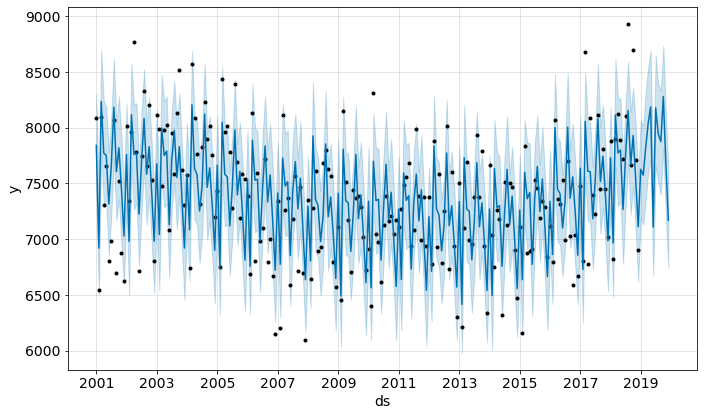

In [71]:
modelo_profeta_treinado.plot(resultado_profeta);